In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
#import shap
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

___

# Read-in and One-Hot Encoding

In [2]:
df1 = pd.read_csv("data/arrival_time_COMPLETE.csv")
df2 = pd.read_csv("data/negative_duration_COMPLETE.csv")
df3 = pd.read_csv("data/negative_peak_time_COMPLETE.csv")
df4 = pd.read_csv("data/negative_pressure_COMPLETE.csv")
df5 = pd.read_csv("data/positive_duration_COMPLETE.csv")
df6 = pd.read_csv("data/positive_impulse_COMPLETE.csv")
df7 = pd.read_csv("data/positive_peak_time_COMPLETE.csv")
df8 = pd.read_csv("data/positive_pressure_COMPLETE.csv")

df1.head(5)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,5.0,0.010208
1,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,6.0,0.012350
2,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,7.0,0.014577
3,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,8.0,0.016878
4,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,9.0,0.019250


In [3]:
# Label encoding 'Status' feature into 0 and 1 
# 0 for Subcooled and 1 for Superheated
# Doing Similarly for ID (Do we need dummy encoding ??)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df5['Status'] = LE.fit_transform(df5['Status'])
df5

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,5.0,0.006817
1,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,6.0,0.007302
2,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,7.0,0.007816
3,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,8.0,0.008326
4,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,9.0,0.008817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,36.0,NaN
35996,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,37.0,NaN
35997,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,38.0,NaN
35998,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,39.0,NaN


In [4]:
X = df5.drop(['ID','Target'], axis=1)[:28800]
X

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,5.0
1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,6.0
2,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,7.0
3,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,8.0
4,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
28795,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,36.0
28796,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,37.0
28797,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,38.0
28798,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,39.0


In [5]:
y5 = df5['Target'][:28800]
y5

0        0.006817
1        0.007302
2        0.007816
3        0.008326
4        0.008817
           ...   
28795    0.012178
28796    0.012275
28797    0.012374
28798    0.012477
28799    0.012573
Name: Target, Length: 28800, dtype: float64

In [6]:
y1 = df1['Target'][:28800]
y2 = df2['Target'][:28800]
y3 = df3['Target'][:28800]
y4 = df4['Target'][:28800]
y6 = df6['Target'][:28800]
y7 = df7['Target'][:28800]
y8 = df8['Target'][:28800]

___

# Train-Test Set Split

In [7]:
X_traindf, X_testdf, y1_train, y1_test = train_test_split(X, y1, test_size=0.25, random_state=42)
print(X_traindf.shape)
print(X_testdf.shape)

(21600, 11)
(7200, 11)


In [8]:
y2_train, y2_test = train_test_split(y2, test_size=0.25, random_state=42)
y3_train, y3_test = train_test_split(y3, test_size=0.25, random_state=42)
y4_train, y4_test = train_test_split(y4, test_size=0.25, random_state=42)
y5_train, y5_test = train_test_split(y5, test_size=0.25, random_state=42)
y6_train, y6_test = train_test_split(y6, test_size=0.25, random_state=42)
y7_train, y7_test = train_test_split(y7, test_size=0.25, random_state=42)
y8_train, y8_test = train_test_split(y8, test_size=0.25, random_state=42)

In [9]:
y7_train.values

array([0.01284534, 0.01444022, 0.10035855, ..., 0.10251021, 0.07990494,
       0.01143898])

In [10]:
y8_train.values

array([1.1268162 , 0.62633157, 0.04595783, ..., 0.02130297, 0.13602383,
       2.3361142 ])

___

# Standardization and Power Transform

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [12]:
# Processing both X_train and X_test using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_traindf)
X_test = scaler.transform(X_testdf)

In [13]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(X_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

In [14]:
quantile1 = QuantileTransformer(output_distribution='normal')
quantile2 = QuantileTransformer(output_distribution='normal')
quantile3 = QuantileTransformer(output_distribution='normal')
quantile4 = QuantileTransformer(output_distribution='normal')
quantile5 = QuantileTransformer(output_distribution='normal')
quantile6 = QuantileTransformer(output_distribution='normal')
quantile7 = QuantileTransformer(output_distribution='normal')
quantile8 = QuantileTransformer(output_distribution='normal')


y1_train_normal = quantile1.fit_transform(y1_train.values.reshape(-1,1))
y1_test_normal = quantile1.transform(y1_test.values.reshape(-1,1))


y2_train_normal = quantile2.fit_transform(y2_train.values.reshape(-1,1))
y2_test_normal = quantile2.transform(y2_test.values.reshape(-1,1))

y3_train_normal = quantile3.fit_transform(y3_train.values.reshape(-1,1))
y3_test_normal = quantile3.transform(y3_test.values.reshape(-1,1))

y4_train_normal = quantile4.fit_transform(y4_train.values.reshape(-1,1))
y4_test_normal = quantile4.transform(y4_test.values.reshape(-1,1))

y5_train_normal = quantile5.fit_transform(y5_train.values.reshape(-1,1))
y5_test_normal = quantile5.transform(y5_test.values.reshape(-1,1))

y6_train_normal = quantile6.fit_transform(y6_train.values.reshape(-1,1))
y6_test_normal = quantile6.transform(y6_test.values.reshape(-1,1))

y7_train_normal = quantile7.fit_transform(y7_train.values.reshape(-1,1))
y7_test_normal = quantile7.transform(y7_test.values.reshape(-1,1))

y8_train_normal = quantile8.fit_transform(y8_train.values.reshape(-1,1))
y8_test_normal = quantile8.transform(y8_test.values.reshape(-1,1))

c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


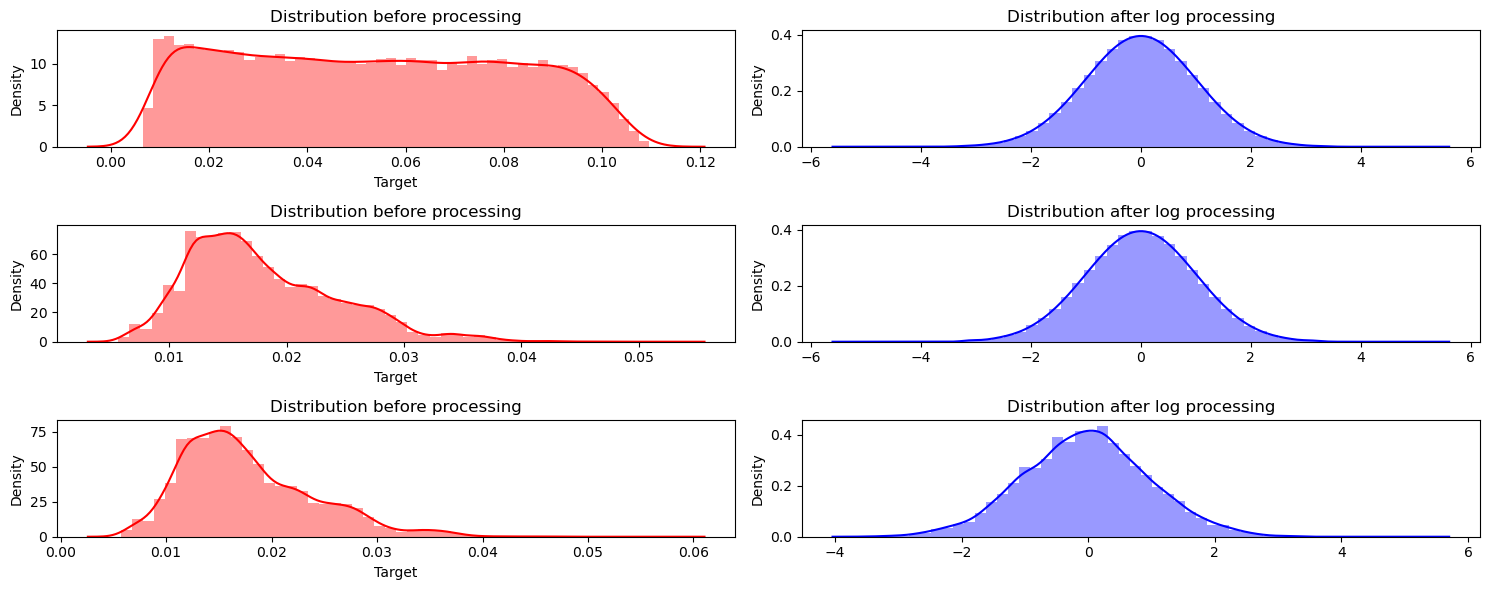

In [15]:
# Visualize the effect of power transformation
f = plt.figure(figsize=(15, 6))

ax = f.add_subplot(321)
sns.distplot(y1_train, bins=50, color='r', ax=ax)
ax.set_title('Distribution before processing')

ax=f.add_subplot(322)
sns.distplot(y1_train_normal, bins=50, color='b', ax=ax)
ax.set_title('Distribution after log processing')
print()

ax = f.add_subplot(323)
sns.distplot(y2_train, bins=50, color='r', ax=ax)
ax.set_title('Distribution before processing')

ax=f.add_subplot(324)
sns.distplot(y2_train_normal, bins=50, color='b', ax=ax)
ax.set_title('Distribution after log processing')
print()

ax = f.add_subplot(325)
sns.distplot(y2_test, bins=50, color='r', ax=ax)
ax.set_title('Distribution before processing')

ax=f.add_subplot(326)
sns.distplot(y2_test_normal, bins=50, color='b', ax=ax)
ax.set_title('Distribution after log processing')
print()

plt.tight_layout()

In [16]:
y1_test_check = quantile1.inverse_transform(y1_test_normal)
y1_test_check

array([[0.09366763],
       [0.01883412],
       [0.04820655],
       ...,
       [0.07486562],
       [0.01489238],
       [0.04292826]])

In [17]:
y1_test

18932    0.093668
21280    0.018834
27880    0.048207
15692    0.092403
25416    0.007377
           ...   
18078    0.024905
3566     0.014557
4129     0.074866
9939     0.014892
11028    0.042928
Name: Target, Length: 7200, dtype: float64

In [18]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(y_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

In [19]:
y1_test_normal

array([[ 1.3816304 ],
       [-1.09278283],
       [-0.11125449],
       ...,
       [ 0.60861875],
       [-1.34397913],
       [-0.24901262]])

___

# ANN

In [15]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.backends.cudnn.version() , torch.backends.cudnn.enabled

(8500, True)

In [21]:
# convert data to torch.FloatTensor
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
X_test_torch = torch.from_numpy(X_test.astype(np.float32))



y1_train_torch = torch.from_numpy(y1_train_normal.astype(np.float32))
y1_test_torch = torch.from_numpy(y1_test_normal.astype(np.float32))

y2_train_torch = torch.from_numpy(y2_train_normal.astype(np.float32))
y2_test_torch = torch.from_numpy(y2_test_normal.astype(np.float32))

y3_train_torch = torch.from_numpy(y3_train_normal.astype(np.float32))
y3_test_torch = torch.from_numpy(y3_test_normal.astype(np.float32))

y4_train_torch = torch.from_numpy(y4_train_normal.astype(np.float32))
y4_test_torch = torch.from_numpy(y4_test_normal.astype(np.float32))

y5_train_torch = torch.from_numpy(y5_train_normal.astype(np.float32))
y5_test_torch = torch.from_numpy(y5_test_normal.astype(np.float32))

y6_train_torch = torch.from_numpy(y6_train_normal.astype(np.float32))
y6_test_torch = torch.from_numpy(y6_test_normal.astype(np.float32))

y7_train_torch = torch.from_numpy(y7_train_normal.astype(np.float32))
y7_test_torch = torch.from_numpy(y7_test_normal.astype(np.float32))

y8_train_torch = torch.from_numpy(y8_train_normal.astype(np.float32))
y8_test_torch = torch.from_numpy(y8_test_normal.astype(np.float32))

print(X_train_torch)

tensor([[ 0.1781, -0.9747, -1.5140,  ..., -0.7230, -0.7424, -1.4851],
        [-0.5207,  0.5219,  0.0684,  ..., -0.3853,  1.3470, -1.4851],
        [ 1.3911,  1.5275, -0.7228,  ...,  1.1182, -0.7424,  1.3998],
        ...,
        [-1.6514,  0.5764, -1.2503,  ...,  0.7199,  1.3470,  1.3998],
        [ 0.9835,  0.0136, -0.7228,  ..., -0.4908, -0.7424,  0.9190],
        [ 1.3715,  0.0745,  0.3321,  ...,  0.5537,  1.3470, -1.4851]])


In [22]:
y1_train_torch

tensor([[-1.7290],
        [-1.5605],
        [ 1.4714],
        ...,
        [ 1.5913],
        [ 0.6395],
        [-1.9274]])

In [23]:
y1_test_torch

tensor([[ 1.3816],
        [-1.0928],
        [-0.1113],
        ...,
        [ 0.6086],
        [-1.3440],
        [-0.2490]])

In [24]:
train_data = []
for i in range(len(X_train_torch)):
   train_data.append([X_train_torch[i],
                      y1_train_torch[i], 
                      y2_train_torch[i],
                      y3_train_torch[i],
                      y4_train_torch[i],
                      y5_train_torch[i],
                      y6_train_torch[i],
                      y7_train_torch[i],
                      y8_train_torch[i]])

test_data = []
for i in range(len(X_test_torch)):
   test_data.append([X_test_torch[i], 
                     y1_test_torch[i],
                     y2_test_torch[i],
                     y3_test_torch[i],
                     y4_test_torch[i],
                     y5_test_torch[i],
                     y6_test_torch[i],
                     y7_test_torch[i],
                     y8_test_torch[i]])

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=512,               # batch_size could be smaller
    num_workers=0)                                                                   # Increasing num_workers slow down the training because it does not use GPU at all
test_loader = torch.utils.data.DataLoader(test_data, batch_size=512,
    num_workers=0)

In [25]:
# for x,y in train_loader:
#     print(y)
#     # break

In [26]:
## Define the NN architecture
## NN with 3 hidden layer, s=[26, 256, 256, 256] -> 8*[256,128] -> 8*[128,1]

class BleveNet(nn.Module):
    def __init__(self):
        super(BleveNet, self).__init__()
        # The first hidden layer has 256 neurons
        self.fc1 = nn.Linear(X_train_torch.shape[1], 256)
        # The second hidden layer has 256 neurons
        self.fc2 = nn.Linear(256, 256)
        # The third hidden layer has 256 neurons
        self.fc3 = nn.Linear(256, 256)
        # The final layer has 1 output neuron
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(256, 128)
        self.fc7 = nn.Linear(256, 128)
        self.fc8 = nn.Linear(256, 128)
        self.fc9 = nn.Linear(256, 128)
        self.fc10 = nn.Linear(256, 128)
        self.fc11 = nn.Linear(256, 128)
        
        self.fc12 = nn.Linear(128,1)
        self.fc13 = nn.Linear(128,1)
        self.fc14 = nn.Linear(128,1)
        self.fc15 = nn.Linear(128,1)
        self.fc16 = nn.Linear(128,1)
        self.fc17 = nn.Linear(128,1)
        self.fc18 = nn.Linear(128,1)
        self.fc19 = nn.Linear(128,1)
       



        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.1)

        # Mish activation
        self.mish = nn.Mish()


    def forward(self, x):
        # add first fully connected layer
        x = self.fc1(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add second fully connected layer
        x = self.fc2(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add third fully connected layer
        x = self.fc3(x)
        x = self.mish(x)
        x = self.dropout(x)
        # separated in 8 different heads and outputs
        head1 = self.fc4(x)
        head1 = self.dropout(head1)
        output1 = self.fc12(head1)

        head2 = self.fc5(x)
        head2 = self.dropout(head2)
        output2 = self.fc13(head2)

        head3 = self.fc6(x)
        head3 = self.dropout(head3)
        output3 = self.fc14(head3)

        head4 = self.fc7(x)
        head4 = self.dropout(head4)
        output4 = self.fc15(head4)

        head5 = self.fc8(x)
        head5 = self.dropout(head5)
        output5 = self.fc16(head5)

        head6 = self.fc9(x)
        head6 = self.dropout(head6)
        output6 = self.fc17(head6)

        head7 = self.fc10(x)
        head7 = self.dropout(head7)
        output7 = self.fc18(head7)

        head8 = self.fc10(x)
        head8 = self.dropout(head8)
        output8 = self.fc19(head8)


        
       
        return output1, output2, output3, output4, output5, output6, output7, output8

# initialize the NN
model = BleveNet()
print(model)

BleveNet(
  (fc1): Linear(in_features=11, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=256, out_features=128, bias=True)
  (fc6): Linear(in_features=256, out_features=128, bias=True)
  (fc7): Linear(in_features=256, out_features=128, bias=True)
  (fc8): Linear(in_features=256, out_features=128, bias=True)
  (fc9): Linear(in_features=256, out_features=128, bias=True)
  (fc10): Linear(in_features=256, out_features=128, bias=True)
  (fc11): Linear(in_features=256, out_features=128, bias=True)
  (fc12): Linear(in_features=128, out_features=1, bias=True)
  (fc13): Linear(in_features=128, out_features=1, bias=True)
  (fc14): Linear(in_features=128, out_features=1, bias=True)
  (fc15): Linear(in_features=128, out_features=1, bias=True)
  (fc16): Linear(in_features=128, out_features=1, bias=True)
  

In [27]:
criterion = nn.HuberLoss()        # This is the best loss function for my model
# criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)     # This is the best optimizer for my model 

# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [28]:
n_epochs = 200 

model.to(device)    # bring the model to gpu
model.train()       # prep model for training

train_losses = []
for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target1, target2, target3, target4, target5, target6, target7, target8 in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        #bring data and target to gpu
        data, target1 = data.to(device), target1.to(device)
        target2, target3 = target2.to(device), target3.to(device)
        target4, target5 = target4.to(device), target5.to(device)
        target6, target7 = target6.to(device), target7.to(device)
        target8 = target8.to(device)
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output1, output2, output3, output4, output5, output6, output7, output8 = model(data)

        # calculate the loss
        loss1 = criterion(output1, target1)
        loss2 = criterion(output2, target2)
        loss3 = criterion(output3, target3)
        loss4 = criterion(output4, target4)
        loss5 = criterion(output5, target5)
        loss6 = criterion(output6, target6)
        loss7 = criterion(output7, target7)
        loss8 = criterion(output8, target8)
        loss = loss1 + loss2 + loss3 + loss4 + loss5 + loss6 + loss7 + loss8
        
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_losses.append(train_loss)

    print('Epoch: {}/{} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        n_epochs, 
        train_loss
        ))

Epoch: 1/200 	Training Loss: 0.575363
Epoch: 2/200 	Training Loss: 0.182850
Epoch: 3/200 	Training Loss: 0.154007
Epoch: 4/200 	Training Loss: 0.139273
Epoch: 5/200 	Training Loss: 0.136139
Epoch: 6/200 	Training Loss: 0.126903
Epoch: 7/200 	Training Loss: 0.126594
Epoch: 8/200 	Training Loss: 0.117366
Epoch: 9/200 	Training Loss: 0.114416
Epoch: 10/200 	Training Loss: 0.110392
Epoch: 11/200 	Training Loss: 0.103925
Epoch: 12/200 	Training Loss: 0.112693
Epoch: 13/200 	Training Loss: 0.105576
Epoch: 14/200 	Training Loss: 0.097406
Epoch: 15/200 	Training Loss: 0.100458
Epoch: 16/200 	Training Loss: 0.097961
Epoch: 17/200 	Training Loss: 0.089820
Epoch: 18/200 	Training Loss: 0.093010
Epoch: 19/200 	Training Loss: 0.090293
Epoch: 20/200 	Training Loss: 0.087330
Epoch: 21/200 	Training Loss: 0.085638
Epoch: 22/200 	Training Loss: 0.104292
Epoch: 23/200 	Training Loss: 0.090500
Epoch: 24/200 	Training Loss: 0.085787
Epoch: 25/200 	Training Loss: 0.082206
Epoch: 26/200 	Training Loss: 0.08

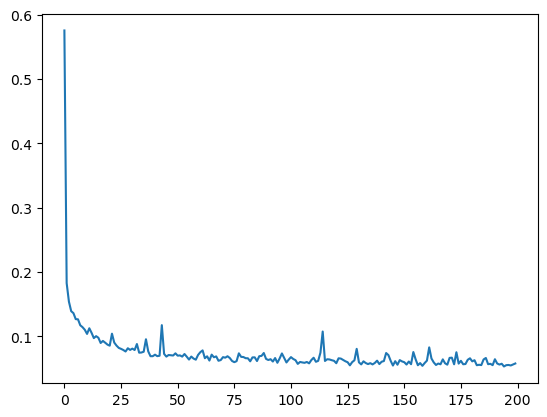

In [29]:
plt.plot(train_losses)

# Save the model  -- I already saved this and submitted
torch.save(model.state_dict(), 'PyTorch_Model/Multi-task_NN_mish_Drop_L2_Huber_200Epoch.pt')

**Loading the saved state**

In [30]:
model.load_state_dict(torch.load('PyTorch_Model/Multi-task_NN_mish_Drop_L2_Huber_200Epoch.pt', map_location=torch.device('cpu')))

model.eval()           # prep model for *evaluation*
model.to(device)
with torch.no_grad():  # turn off gradient to save memory
    y1_predNN_torch, y2_predNN_torch, y3_predNN_torch, y4_predNN_torch, y5_predNN_torch, y6_predNN_torch, y7_predNN_torch, y8_predNN_torch  = model(X_test_torch.to(device))

y1_predNN_normal = y1_predNN_torch.cpu().numpy()     # convert to numpy array
y1_test_normal = y1_test_torch.cpu().numpy()

y2_predNN_normal = y2_predNN_torch.cpu().numpy()     # convert to numpy array
y2_test_normal = y2_test_torch.cpu().numpy()

y3_predNN_normal = y3_predNN_torch.cpu().numpy()     # convert to numpy array
y3_test_normal = y3_test_torch.cpu().numpy()

y4_predNN_normal = y4_predNN_torch.cpu().numpy()     # convert to numpy array
y4_test_normal = y4_test_torch.cpu().numpy()

y5_predNN_normal = y5_predNN_torch.cpu().numpy()     # convert to numpy array
y5_test_normal = y5_test_torch.cpu().numpy()

y6_predNN_normal = y6_predNN_torch.cpu().numpy()     # convert to numpy array
y6_test_normal = y6_test_torch.cpu().numpy()

y7_predNN_normal = y7_predNN_torch.cpu().numpy()     # convert to numpy array
y7_test_normal = y7_test_torch.cpu().numpy()

y8_predNN_normal = y8_predNN_torch.cpu().numpy()     # convert to numpy array
y8_test_normal = y8_test_torch.cpu().numpy()

print(y1_predNN_normal)

[[ 1.3291078 ]
 [-1.0742247 ]
 [-0.12600875]
 ...
 [ 0.5478258 ]
 [-1.320213  ]
 [-0.16395132]]


In [31]:
mape = mean_absolute_percentage_error(y1_test_normal, y1_predNN_normal)
r2 = r2_score(y1_test_normal, y1_predNN_normal)
rmse = np.sqrt(mean_squared_error(y1_test_normal, y1_predNN_normal))
print(f"Scores in normal distribution: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in normal distribution: r2 = 0.9948695223818185, mape = 0.18241173028945923, rmse = 0.07141739130020142


___

# Arrival Time

In [32]:
y1_predNN = quantile1.inverse_transform(y1_predNN_normal)
mape = mean_absolute_percentage_error(y1_test, y1_predNN)
r2 = r2_score(y1_test, y1_predNN)
rmse = np.sqrt(mean_squared_error(y1_test, y1_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9986060031768468, mape = 0.02035306308855811, rmse = 0.0010344925794777949


___

# Negative Duration

In [33]:
y2_predNN = quantile2.inverse_transform(y2_predNN_normal)
mape = mean_absolute_percentage_error(y2_test, y2_predNN)
r2 = r2_score(y2_test, y2_predNN)
rmse = np.sqrt(mean_squared_error(y2_test, y2_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.974039803344058, mape = 0.04038336927029765, rmse = 0.0010045250433152243


In [34]:
y2_test

18932    0.018548
21280    0.014985
27880    0.022609
15692    0.021865
25416    0.021366
           ...   
18078    0.015043
3566     0.013959
4129     0.016827
9939     0.028229
11028    0.007865
Name: Target, Length: 7200, dtype: float64

___

# Negative Peak Time

In [35]:
y3_predNN = quantile3.inverse_transform(y3_predNN_normal)
mape = mean_absolute_percentage_error(y3_test, y3_predNN.astype('float64'))
r2 = r2_score(y3_test, y3_predNN)
rmse = np.sqrt(mean_squared_error(y3_test, y3_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9986788802064868, mape = 0.013674643638160306, rmse = 0.0010807212135365183


In [36]:
y3_predNN = quantile3.inverse_transform(y3_predNN_normal)
mape = mean_absolute_percentage_error(y3_test, y3_predNN)
r2 = r2_score(y3_test, y3_predNN)
rmse = np.sqrt(mean_squared_error(y3_test, y3_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9986788802064868, mape = 0.013674643638160306, rmse = 0.0010807212135365183


In [37]:
y3_test

18932    0.116362
21280    0.033227
27880    0.072927
15692    0.116398
25416    0.022405
           ...   
18078    0.041118
3566     0.027763
4129     0.092752
9939     0.035040
11028    0.052456
Name: Target, Length: 7200, dtype: float64

___

# Negative Pressure

In [ ]:
y4_predNN = quantile4.inverse_transform(y4_predNN_normal)
mape = mean_absolute_percentage_error(y4_test, y4_predNN)
r2 = r2_score(y4_test, y4_predNN)
rmse = np.sqrt(mean_squared_error(y4_test, y4_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9918704094770097, mape = 0.04770668017083091, rmse = 0.00694392266880447


In [39]:
y4_test

18932   -0.062235
21280   -0.187983
27880   -0.110915
15692   -0.052794
25416   -0.349804
           ...   
18078   -0.145897
3566    -0.141677
4129    -0.059899
9939    -0.287671
11028   -0.038245
Name: Target, Length: 7200, dtype: float64

___

# Positive Duration

In [40]:
y5_predNN = quantile5.inverse_transform(y5_predNN_normal)
mape = mean_absolute_percentage_error(y5_test, y5_predNN)
r2 = r2_score(y5_test, y5_predNN)
rmse = np.sqrt(mean_squared_error(y5_test, y5_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9830930515001223, mape = 0.032112139767535366, rmse = 0.00044250877924814283


In [41]:
y5_test

18932    0.015275
21280    0.008399
27880    0.015677
15692    0.015249
25416    0.006481
           ...   
18078    0.010196
3566     0.007622
4129     0.011155
9939     0.008856
11028    0.006381
Name: Target, Length: 7200, dtype: float64

___

# Positive Impulse

In [42]:
y6_predNN = quantile6.inverse_transform(y6_predNN_normal)
mape = mean_absolute_percentage_error(y6_test, y6_predNN)
r2 = r2_score(y6_test, y6_predNN)
rmse = np.sqrt(mean_squared_error(y6_test, y6_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.962417126209258, mape = 0.07002792903267453, rmse = 18.9774491621646


In [43]:
y6_test

18932     38.754070
21280    110.768800
27880     91.407677
15692     37.658916
25416    370.861050
            ...    
18078     70.016380
3566      54.697094
4129      35.103203
9939     361.880250
11028     12.516535
Name: Target, Length: 7200, dtype: float64

In [44]:
y6_predNN

array([[ 40.603813],
       [106.66979 ],
       [ 91.22891 ],
       ...,
       [ 36.593388],
       [310.08795 ],
       [ 14.041971]], dtype=float32)

___

# Positive Peak Time

In [45]:
y7_predNN = quantile7.inverse_transform(y7_predNN_normal)
mape = mean_absolute_percentage_error(y7_test, y7_predNN)
r2 = r2_score(y7_test, y7_predNN)
rmse = np.sqrt(mean_squared_error(y7_test, y7_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9987937855928005, mape = 0.018078621211856778, rmse = 0.000996768551071203


In [46]:
y7_test

18932    0.098509
21280    0.021243
27880    0.051674
15692    0.097420
25416    0.008754
           ...   
18078    0.027915
3566     0.017232
4129     0.079326
9939     0.016577
11028    0.047389
Name: Target, Length: 7200, dtype: float64

In [47]:
y7_predNN

array([[0.09792978],
       [0.02127686],
       [0.05162923],
       ...,
       [0.0771234 ],
       [0.01680587],
       [0.04962502]], dtype=float32)

___

# Positive Pressure

In [48]:
y8_predNN = quantile8.inverse_transform(y8_predNN_normal)
mape = mean_absolute_percentage_error(y8_test, y8_predNN)
r2 = r2_score(y8_test, y8_predNN)
rmse = np.sqrt(mean_squared_error(y8_test, y8_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9544891921858082, mape = 0.08405042020397048, rmse = 0.07069505446096701


In [49]:
y8_test

18932    0.080268
21280    0.399188
27880    0.184898
15692    0.070768
25416    1.603528
           ...   
18078    0.233269
3566     0.238918
4129     0.092671
9939     1.170312
11028    0.047712
Name: Target, Length: 7200, dtype: float64

In [50]:
y8_predNN

array([[0.08618742],
       [0.36535951],
       [0.18296608],
       ...,
       [0.09594756],
       [0.9299911 ],
       [0.05473821]], dtype=float32)